# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

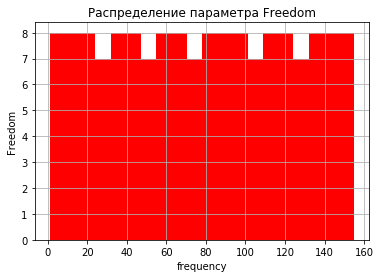

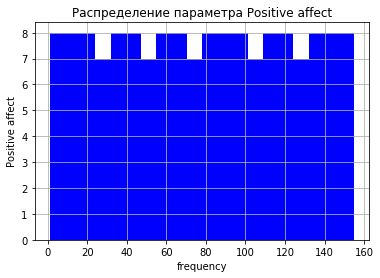

Оба распределения являются равномерными


In [4]:
freedom = df['Freedom'].dropna()
positive_affect = df['Positive affect'].dropna()


plt.title('Распределение параметра Freedom')
plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.grid(True)
plt.hist(freedom, 20, facecolor='r')
plt.show()


plt.title('Распределение параметра Positive affect')
plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.grid(True)
plt.hist(positive_affect, 20, facecolor='b')
plt.show()


print('Оба распределения являются равномерными')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [5]:
freedom = df['Freedom']

# Начнем с выбросов
outlier = freedom.isnull().sum()
freedom = freedom.dropna()

# Медиана
median = statistics.median(freedom)

# Мода, если она есть
try: mode = statistics.mode(freedom)
except: mode = 'отсутствует'

# Среднее, оно же Математическое ожидание
mean = statistics.mean(freedom)

# Стандартное отклонение и Дисперсия
sd = round(statistics.pstdev(freedom),1)
variance = statistics.pvariance(freedom)

# Минимум и Максимум и Размах
min_ = min(freedom)
max_ = max(freedom)
range_ = max_ - min_

print("""
    Медиана — {}
    Мода - {}
    Математическое ожидание — {}
    Стандартное отклонение — {}
    Дисперсия — {}
    Минимум и Максимум — {} и {}
    сумма Выбросов — {}
    Размах — {}""".format(median, mode, mean, sd, variance, min_, max_, outlier, range_))


    Медиана — 78.0
    Мода - отсутствует
    Математическое ожидание — 78.0
    Стандартное отклонение — 44.7
    Дисперсия — 2002.0
    Минимум и Максимум — 1.0 и 155.0
    сумма Выбросов — 1
    Размах — 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.697


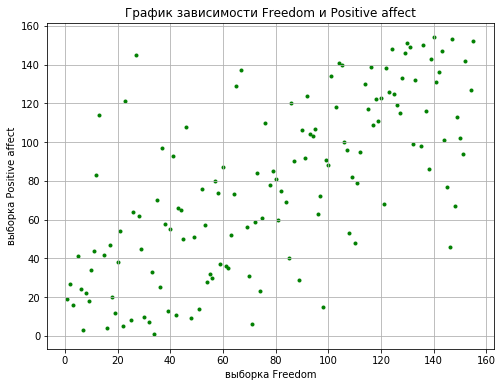

In [6]:
df_new = df.dropna()
freedom = df_new['Freedom']
positive_affect = df_new['Positive affect']

plt.figure(figsize=(8,6))
plt.title('График зависимости Freedom и Positive affect')
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.', color='g')

coef_corr = round(sts.pearsonr(freedom, positive_affect)[0],3)
print('Коэффициент корреляции Пирсона:', coef_corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

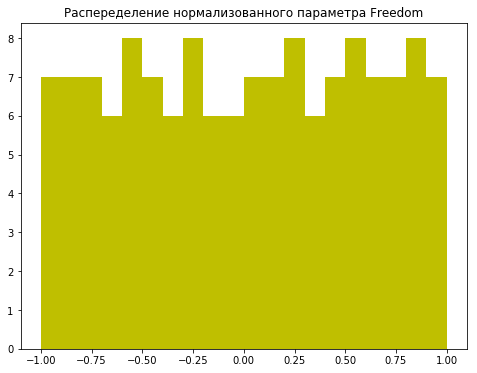

In [7]:
# Централизация
freedom_cen = freedom - statistics.mean(freedom)

# Масштабирование
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_norm = min_max_scaler.fit_transform(np.array(freedom_cen).reshape(-1, 1))

# Результат
plt.figure(figsize=(8,6))
plt.title('Распеределение нормализованного параметра Freedom')
plt.hist(freedom_norm, 20, color='y')
plt.show()

Построить матрицу корреляций для всех колонок таблицы

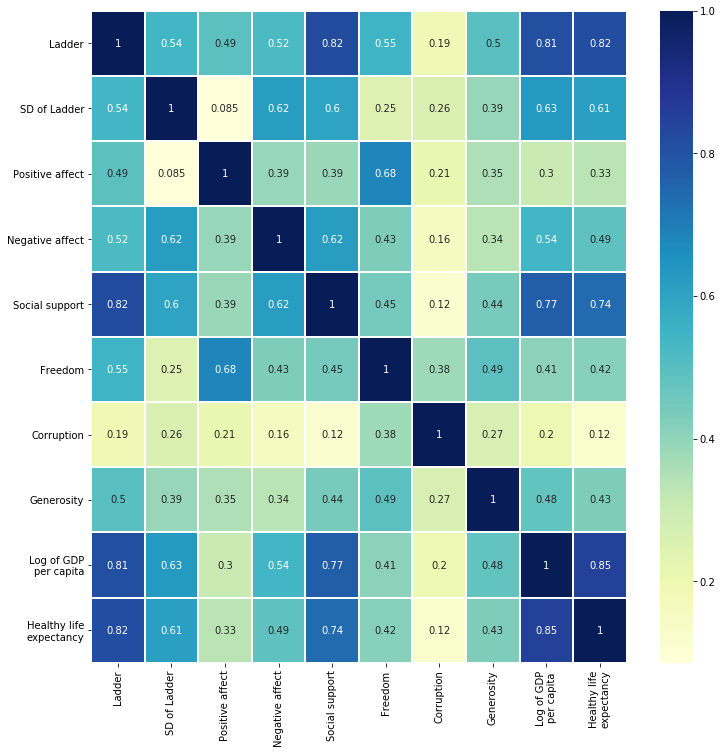

In [8]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=1)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [9]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

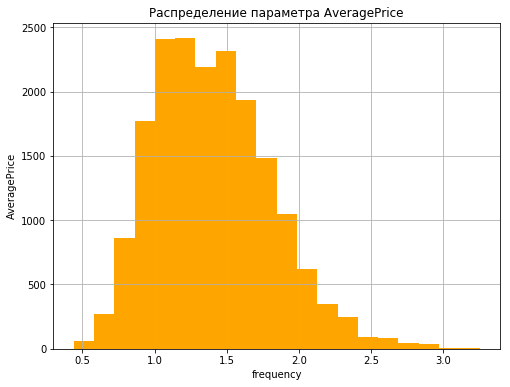

Распределение похоже на нормальное, но с некоторой положительной ассиметрией
В крайнем случае, если не ошибаюь, это можно считать логарифмическим распределением


In [10]:
average_price = df['AveragePrice']

plt.figure(figsize=(8,6))
plt.title('Распределение параметра AveragePrice')
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.grid(True)
plt.hist(average_price, 20, color='orange')
plt.show()

print('Распределение похоже на нормальное, но с некоторой положительной ассиметрией')
print('В крайнем случае, если не ошибаюь, это можно считать логарифмическим распределением')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Корреляця Пирсона между Avocado 4046 и Average Price
составила -0.208, а значит корреляция не сильная!


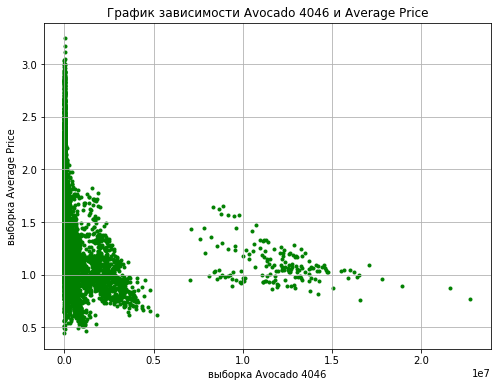

In [11]:
avocado4046 = df['4046']
average_price = df['AveragePrice']

plt.figure(figsize=(8,6))
plt.title('График зависимости Avocado 4046 и Average Price')
plt.xlabel('выборка Avocado 4046')
plt.ylabel('выборка Average Price')
plt.grid(True)
plt.scatter(avocado4046, average_price, marker='.', color='g')

avo_corr = round(sts.pearsonr(avocado4046, average_price)[0],3)
if abs(avo_corr) >= 0.7:
    res = 'сильная'
else: res = 'не сильная'

print('Корреляця Пирсона между Avocado 4046 и Average Price\nсоставила {}, а значит корреляция {}!'
      .format(avo_corr,res))